# Explore here

In [1]:
import pandas as pd
#Paso 1: Recopilación de datos

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#crear base de datos en carpeta 'raw'
df.to_csv("../data/raw/insurance_data.csv", index = False)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
#eliminar duplicados
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Función util para identificar el tipo de variable: Categórica o Numérica
def separar_columnas(df):
    categoricas = []
    numericas = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')
separar_columnas(df)

Categóricas: ['sex', 'smoker', 'region']
Númericas: ['age', 'bmi', 'children', 'charges']


In [5]:
df.drop(['sex','region','children'], axis = 1, inplace = True)
df.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


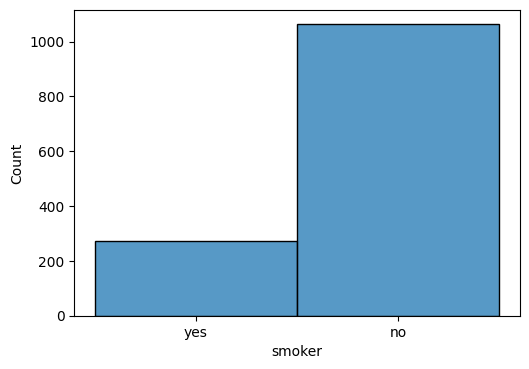

In [6]:
# Analisis de variables univariadas, analisis de variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Crear Histograma

sns.histplot(ax = axis[0,0], data = df, x = "smoker")


fig.delaxes(axis[0, 1])
fig.delaxes(axis[1, 0])
fig.delaxes(axis[1, 1])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

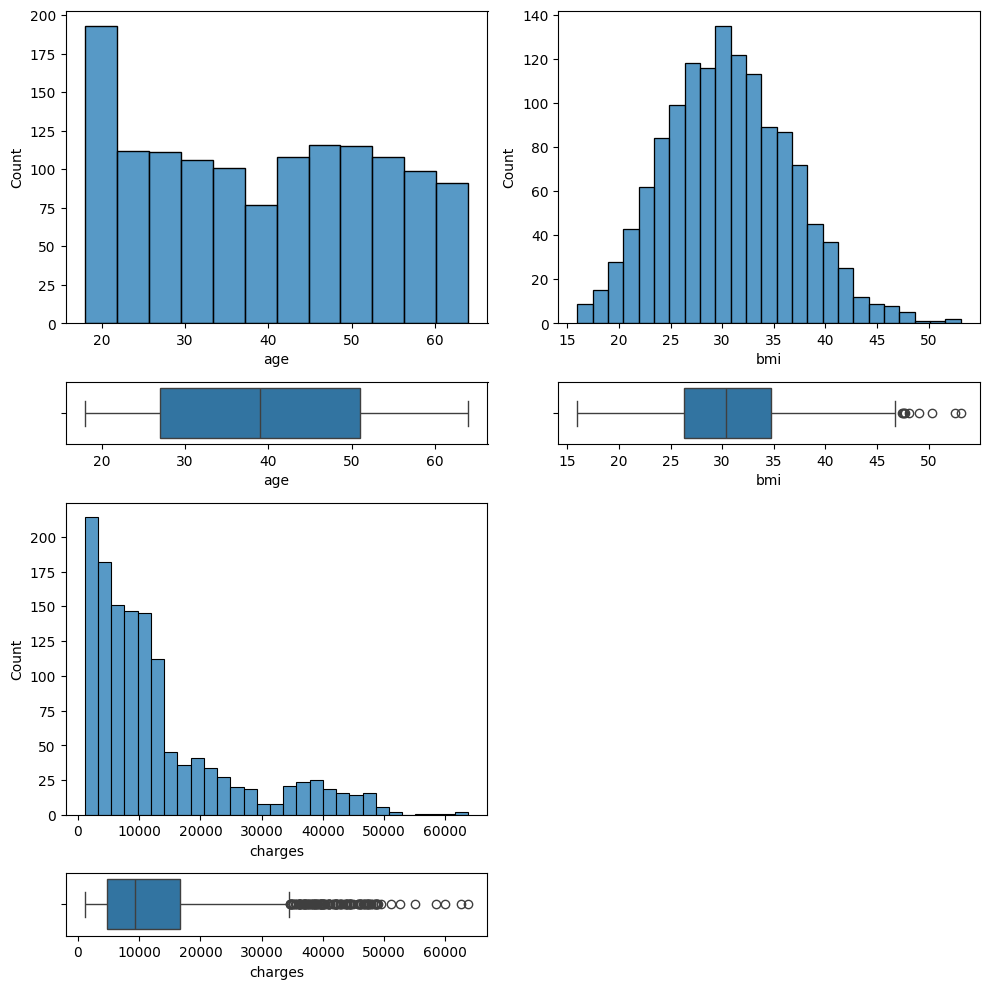

In [7]:
# Analisis de variables univariadas, analisis de variables numéricas
fig, axis = plt.subplots(4,2,figsize=(10,10),gridspec_kw={"height_ratios":[5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='bmi')
sns.boxplot(ax=axis[1,1],data=df,x='bmi')

sns.histplot(ax=axis[2,0],data=df,x='charges')
sns.boxplot(ax=axis[3,0],data=df,x='charges')


fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

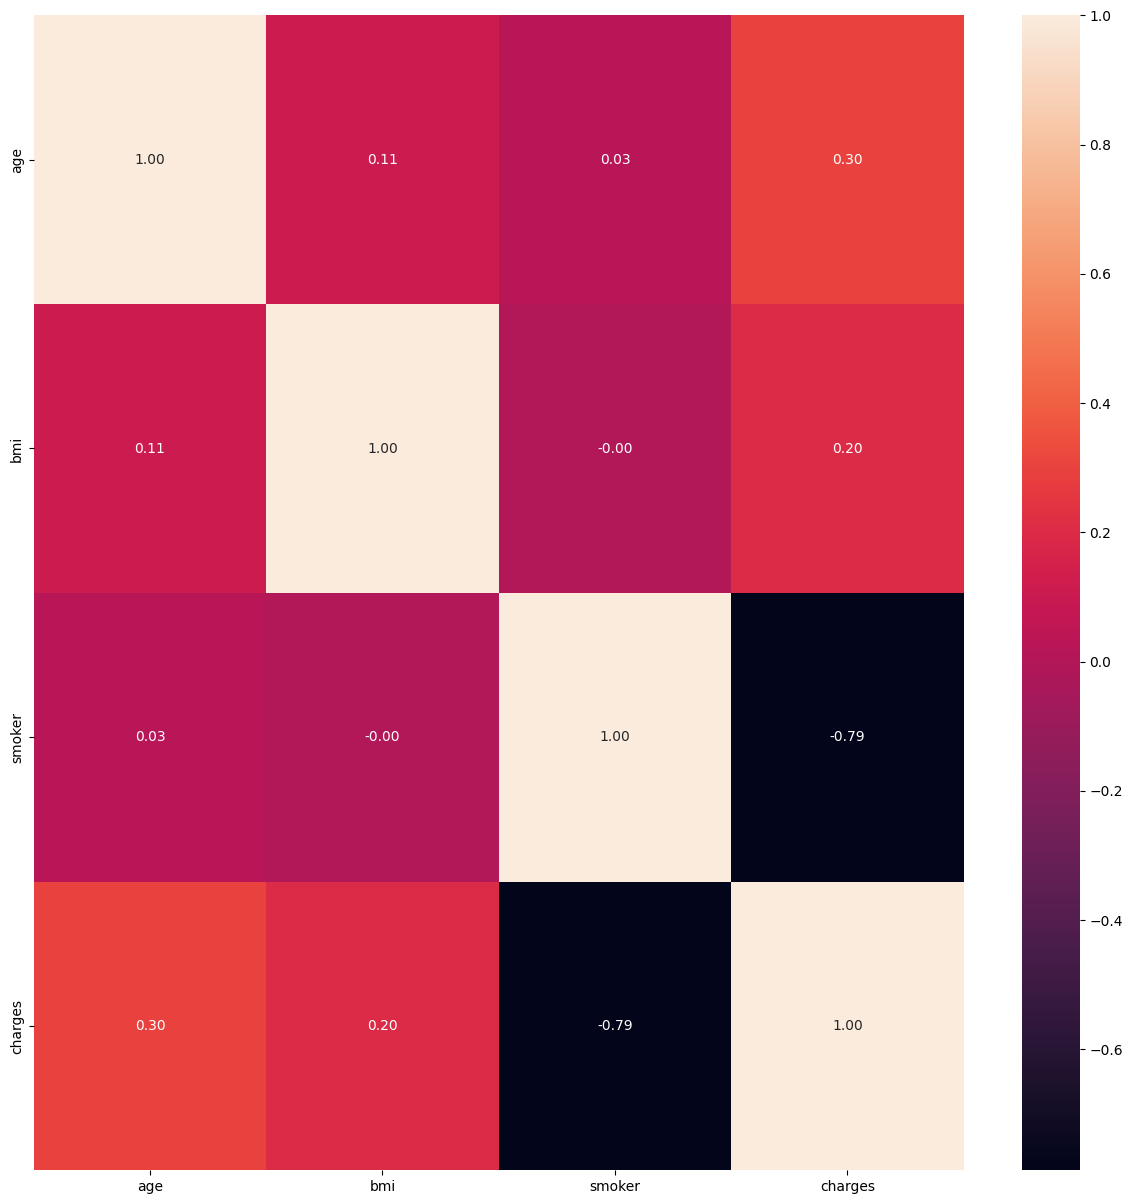

In [8]:
    #Análisis de todas las correlaciónes
    # Factorización de variables cátegoricas
df['smoker'] = pd.factorize(df['smoker'])[0]

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

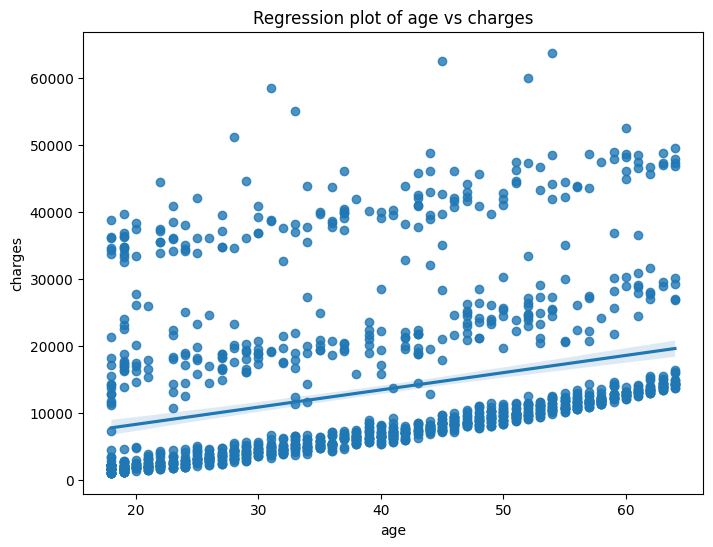

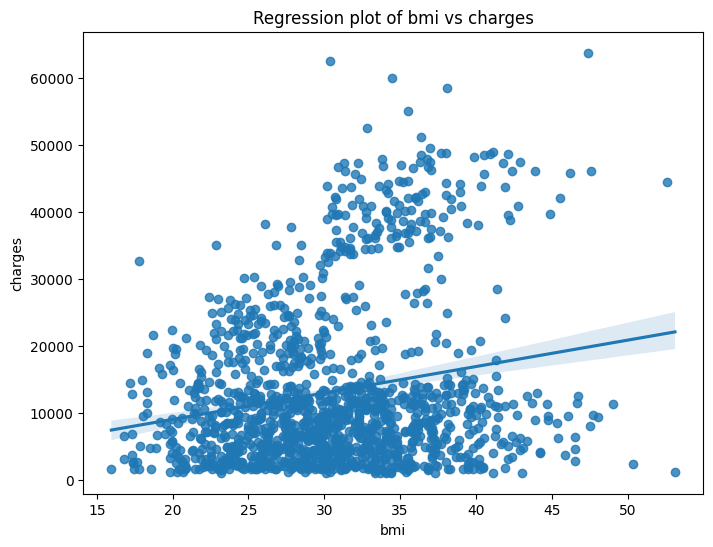

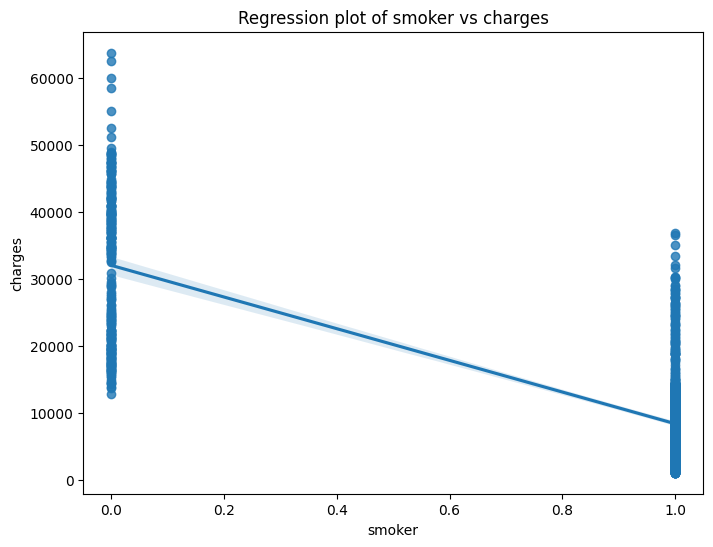

In [9]:
# Regplot para cada variable independiente vs variable objetivo
import matplotlib.pyplot as plt
import seaborn as sns
objetivo = 'charges'
independent_vars = df.columns.difference([objetivo])

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[var], y=df[objetivo])
    plt.title(f'Regression plot of {var} vs {objetivo}')
    plt.show()

In [10]:
#normalizar variables independientes

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columnas_para_normalizar = ["age","bmi","smoker"]
col_escaladas = scaler.fit_transform(df[columnas_para_normalizar])

df_escalado = pd.DataFrame(col_escaladas, columns=["age","bmi","smoker"])
df_escalado['charges'] = df['charges'].values

df_escalado.head()

,age,bmi,smoker,charges
0,0.021739,0.321227,0.0,16884.92400
1,0.000000,0.479150,1.0,1725.55230
2,0.217391,0.458434,1.0,4449.46200
3,0.326087,0.181464,1.0,21984.47061
4,0.304348,0.347592,1.0,3866.85520


In [11]:
#dividir en train y test
from sklearn.model_selection import train_test_split

X = df_escalado.drop("charges", axis=1)
y = df_escalado["charges"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
#  Selección de características con SelectKBest (Ensayo y Error)

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=3)
X_train_sel = selector.fit_transform(X_train, y_train)

# Transformación a los datos de test
X_test_sel = selector.transform(X_test)

# Obtener las columnas seleccionadas

selected_features = selector.get_support(indices=True)
best_columns = X.columns[selected_features]
print("Columnas seleccionadas:", best_columns)

# Escalar las características seleccionadas con MinMaxScaler

scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train_sel) 
X_test_esc = scaler.transform(X_test_sel) 

Columnas seleccionadas: Index(['age', 'bmi', 'smoker'], dtype='object')


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test_esc)

from sklearn.metrics import mean_squared_error, r2_score

print(f'Los coheficientes del modelo es: {model.coef_}')
print(f'El intercepto del modelo es: {model.intercept_}')
print(f'El MSE es: {mean_squared_error(y_pred,y_test)}')
print(f'El R2 es: {r2_score(y_pred,y_test)}')

Los coheficientes del modelo es: [ 11586.30415359  11329.51105637 -23074.26173498]
El intercepto del modelo es: 21701.79391257018
El MSE es: 35841574.81814754
El R2 es: 0.6876328492321628


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


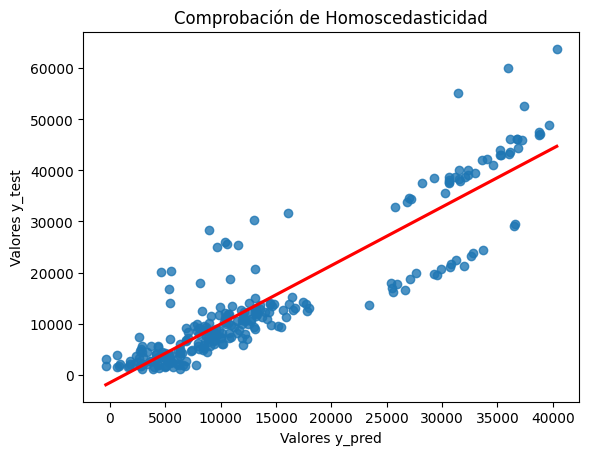

In [21]:
# Comprobación de Homoscedasticidad
sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"}, ci=None)


plt.xlabel('Valores y_pred')
plt.ylabel('Valores y_test')
plt.title('Comprobación de Homoscedasticidad')


plt.show()

Comprobación de cinco supuestos en los que se basa la Regresión Líneal:
Linealidad: La variable a predecir se puede modelar en función de las variables predictoras (age,bmi,smoker), se observa en los graficos de regresión de la variable 'charge' respecto de las variables predictoras.
Independencia: Las variables presentan una baja correlacion entre las variables predictoras, se observa en la matriz de correlación.
Homoscedasticidad: Podemos observar en el gráfico de comprobación de homoscedasticidad que la distancia entre los puntos predichos y los de la muestra se mantiene estable en cualquier valor de la muestra.
Normalidad de los errores: Los errores están normalmente distribuidos.
Ausencia de multicolinealidad: Las correlaciones entre las variables predictoras son muy bajas, se observa en los gráficos multivariantes hechos en el EDA.